In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Make plots look better
plt.style.use("ggplot")


In [3]:
df = pd.read_csv(r"C:\Users\subhashini\Downloads\googleplaystore.csv")


In [4]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
print("Shape of dataset:", df.shape)
df.info()
df.describe()


Shape of dataset: (10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
# Drop problematic row (10472)
if 10472 in df.index:
    df.drop(10472, axis=0, inplace=True)

# Convert Reviews to int
df["Reviews"] = df["Reviews"].astype(str).str.replace(",", "")
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce").fillna(0).astype(int)

# Clean Installs column
df["Installs"] = df["Installs"].astype(str).str.replace("+", "").str.replace(",", "")
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce").fillna(0).astype(int)

# Clean Price column
df["Price"] = df["Price"].astype(str).str.replace("$", "")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce").fillna(0).astype(float)

# Convert Size into bytes
def convert_size(x):
    if isinstance(x, str):
        if "k" in x:
            return float(x.replace("k", "")) * 1024
        elif "M" in x:
            return float(x.replace("M", "")) * 1024 * 1024
        elif "Varies" in x:
            return np.nan
    return pd.to_numeric(x, errors="coerce")

df["Size_in_bytes"] = df["Size"].apply(convert_size)
df["Size_MB"] = df["Size_in_bytes"] / (1024*1024)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Size_in_bytes     1695
Size_MB           1695
dtype: int64


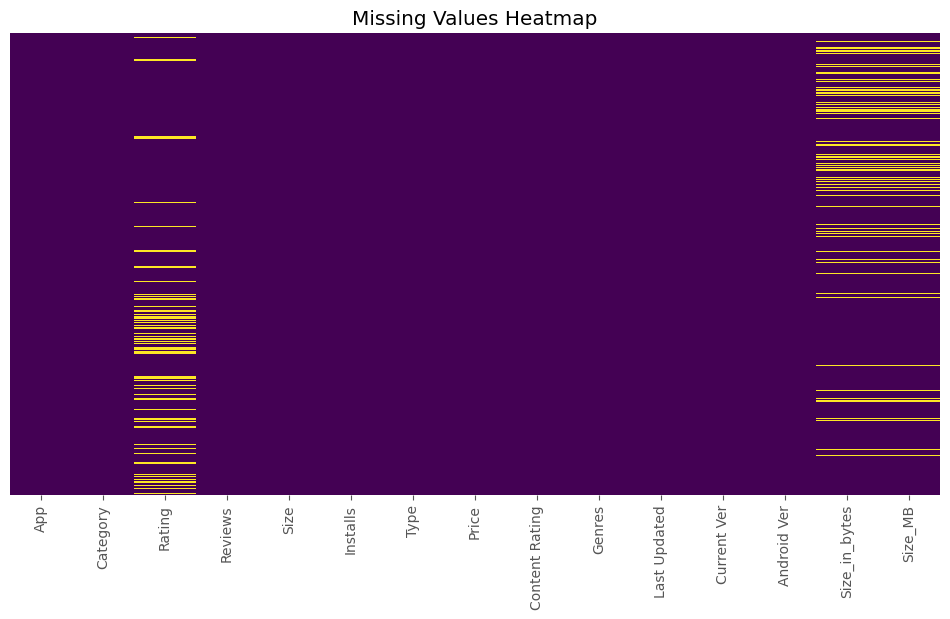

In [7]:
print(df.isnull().sum())

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [8]:
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 483
Duplicates after: 0


In [9]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ["no", "Very low", "Low", "Moderate", "More than moderate", "High", "Very High", "Top Notch"]
df["Installs_category"] = pd.cut(df["Installs"], bins=bins, labels=labels)

df["Installs_category"].value_counts()


Installs_category
Low                   2132
High                  2005
Very High             1815
More than moderate    1603
Moderate              1502
Top Notch              751
Very low               534
no                      15
Name: count, dtype: int64

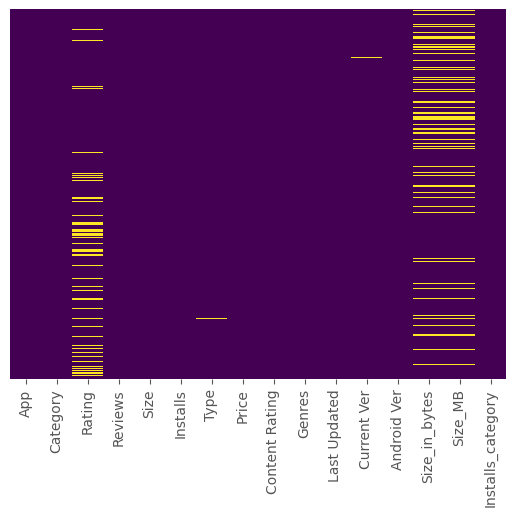

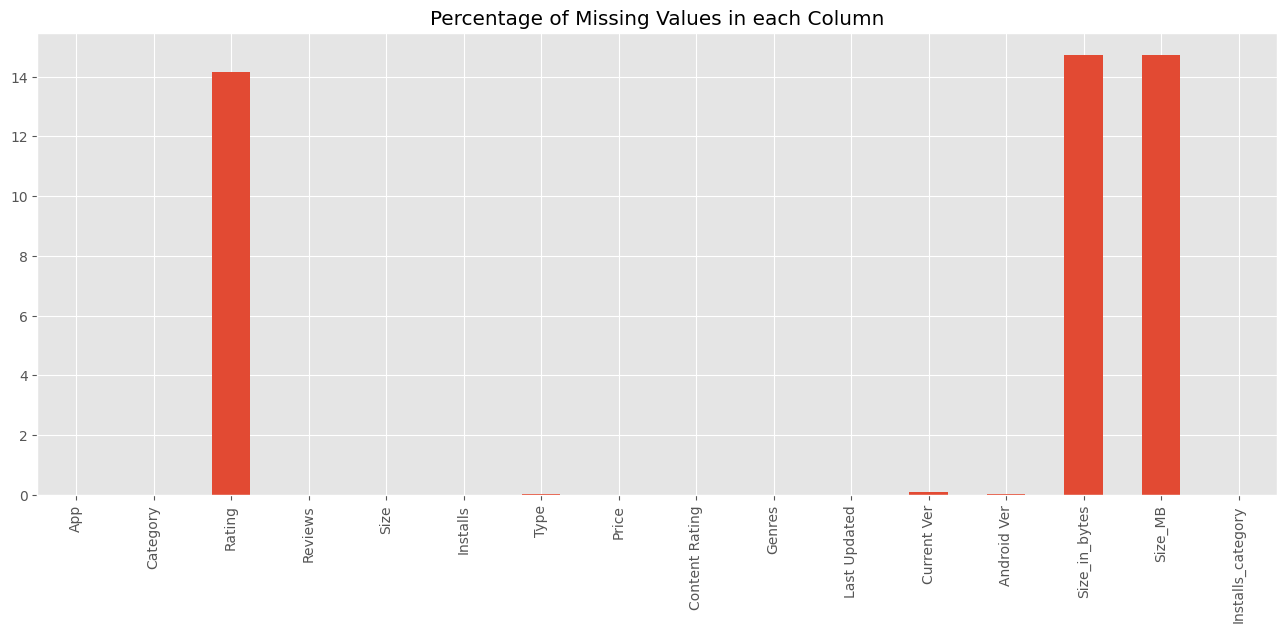

In [10]:
df.isnull().sum().sort_values(ascending=False)

# Heatmap of missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

# Missing values percentage plot
plt.figure(figsize=(16,6))
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values in each Column')
plt.show()


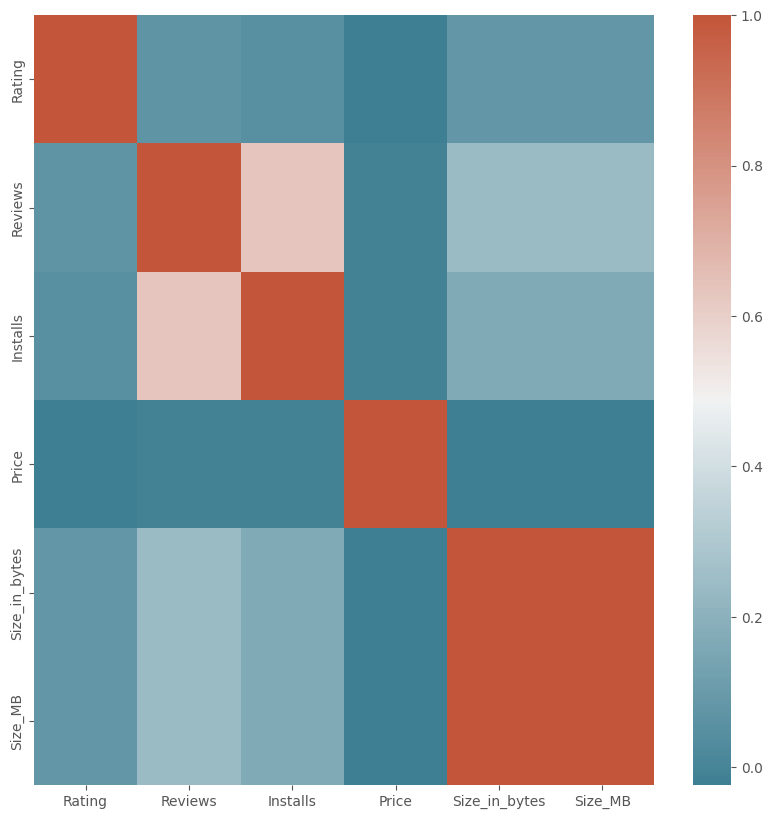

In [11]:
numeric_cols = [i for i in df.columns if df[i].dtype != 'object']
numeric_cols.remove("Installs_category")

corr = df[numeric_cols].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()


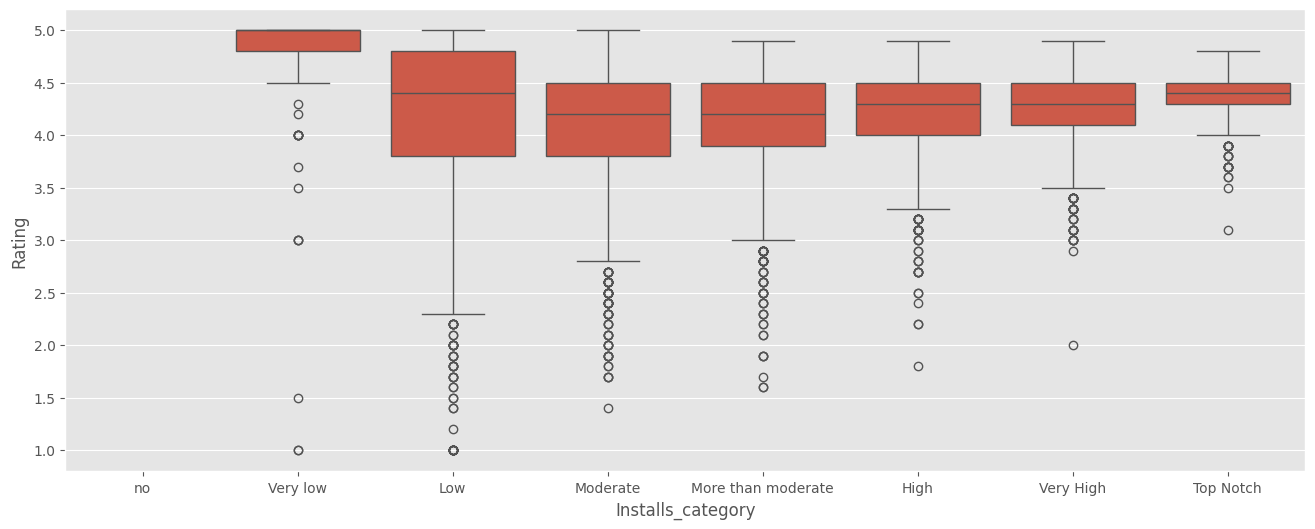

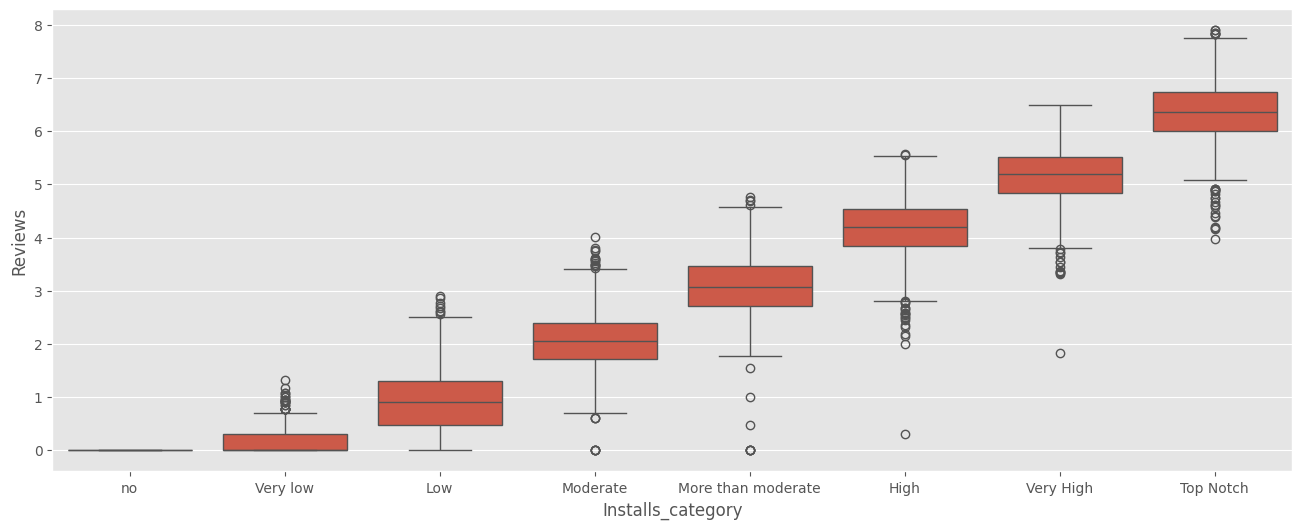

In [12]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y='Rating', data=df)
plt.show()

plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y=np.log10(df['Reviews']+1), data=df)
plt.show()


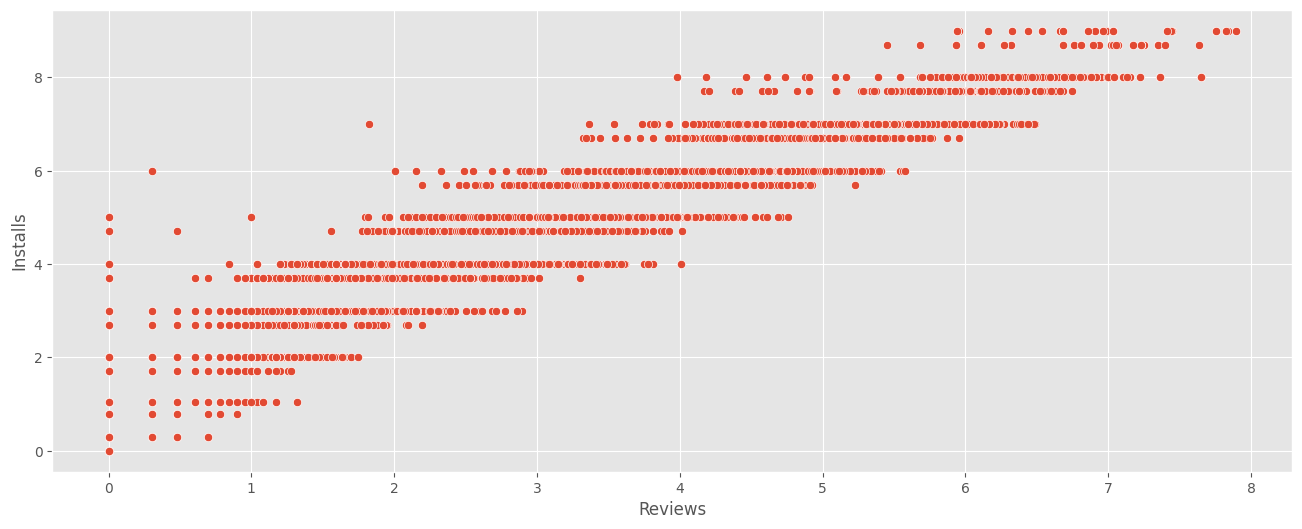

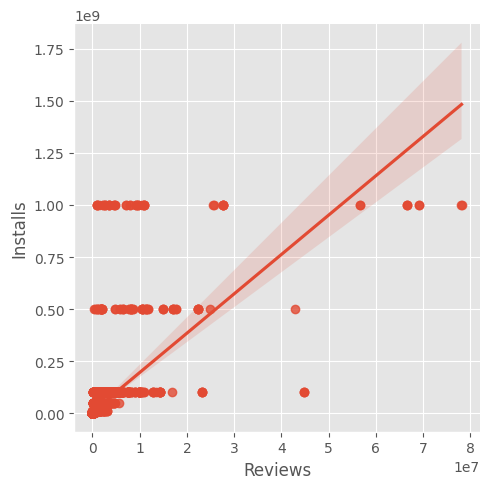

In [13]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=np.log10(df['Reviews']+1), y=np.log10(df['Installs']+1), data=df)
plt.show()

sns.lmplot(x='Reviews', y='Installs', data=df)


<Axes: xlabel='Category'>

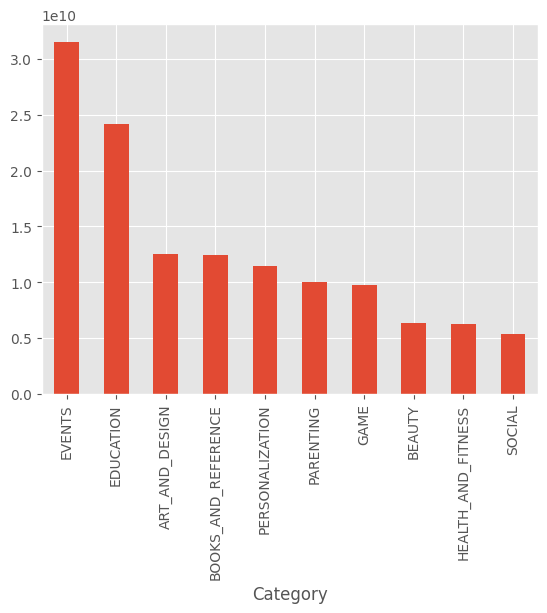

In [14]:
# Top 10 categories by app count
df['Category'].value_counts().head(10).plot(kind='bar')

# Top categories by installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

# Top categories by reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

# Top categories by rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')


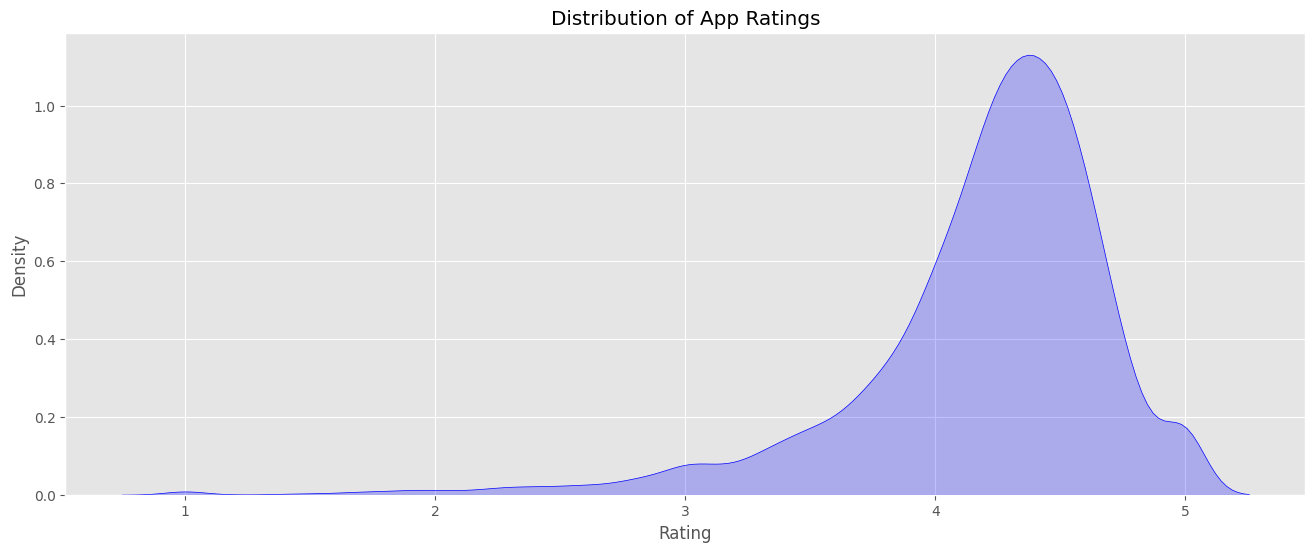

In [15]:
plt.figure(figsize=(16,6))
sns.kdeplot(df['Rating'], color="blue", shade=True)
plt.title("Distribution of App Ratings")
plt.show()


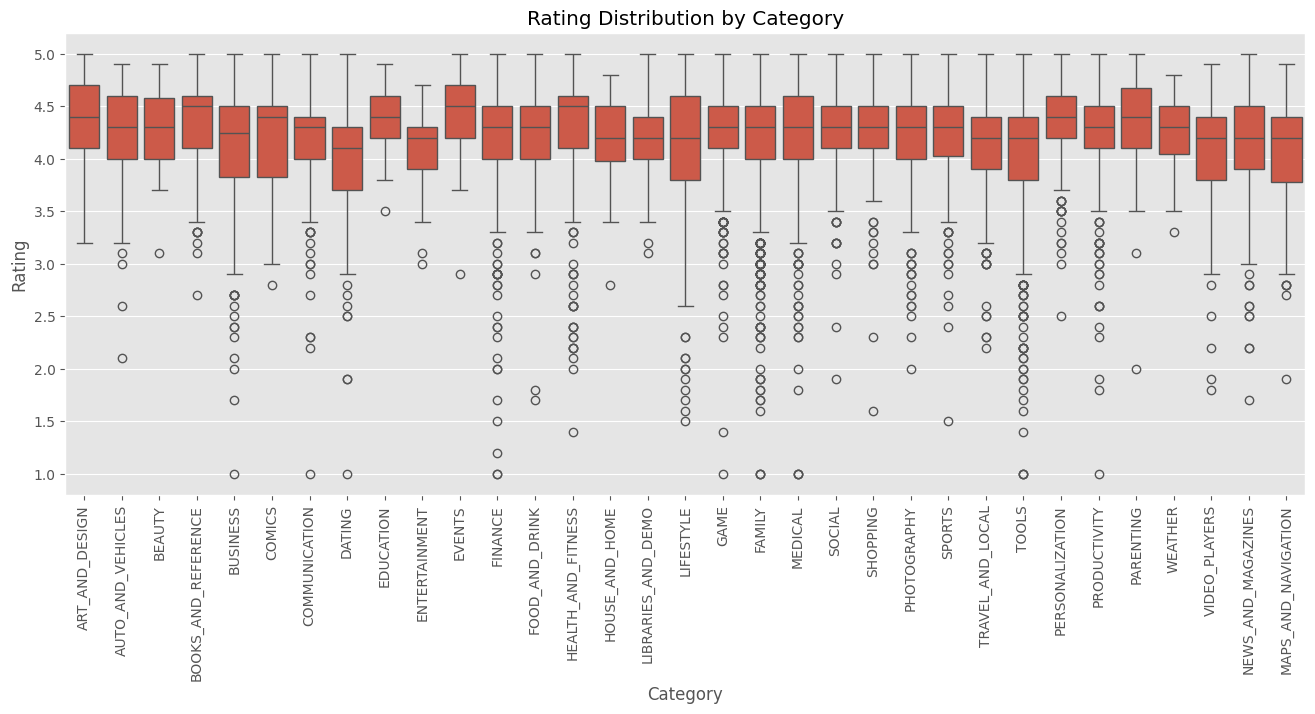

In [16]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title("Rating Distribution by Category")
plt.show()


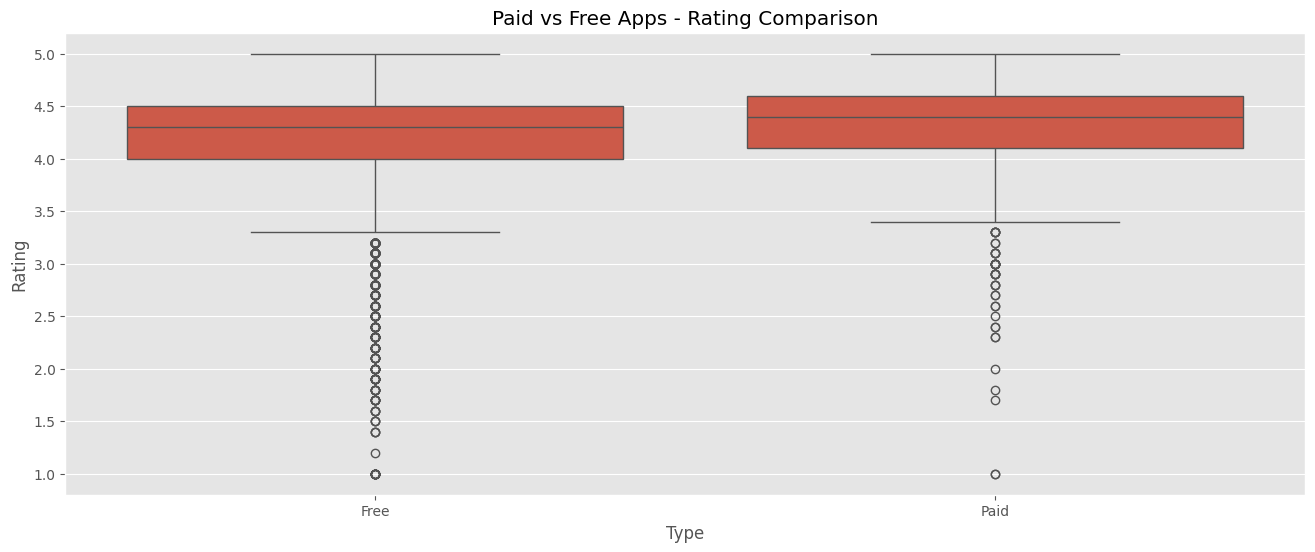

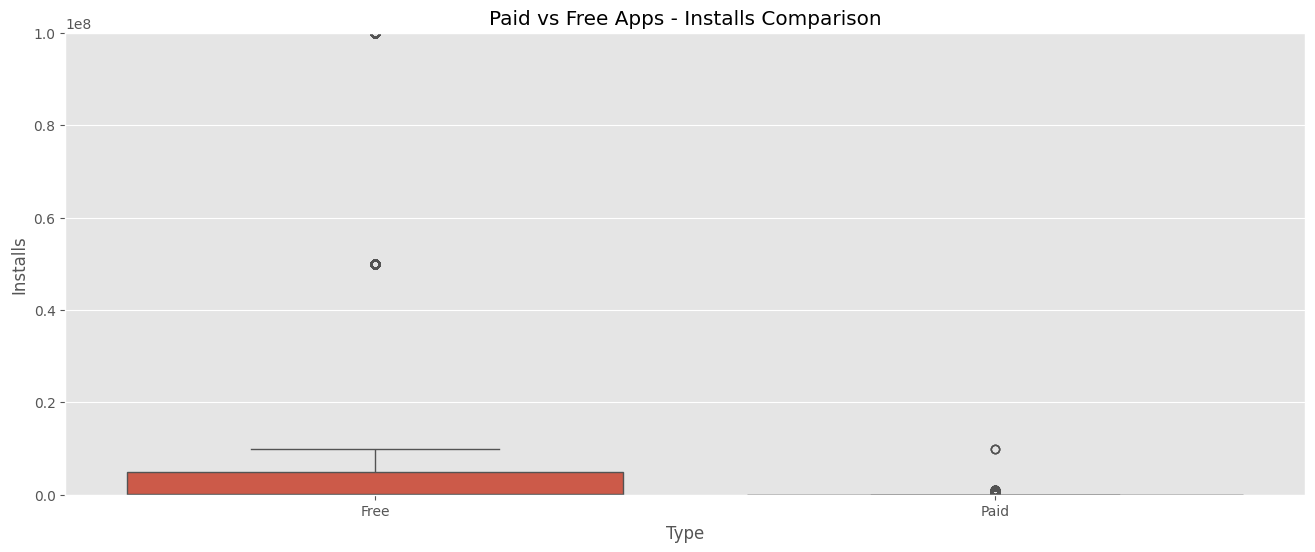

In [17]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Type', y='Rating', data=df)
plt.title("Paid vs Free Apps - Rating Comparison")
plt.show()

plt.figure(figsize=(16,6))
sns.boxplot(x='Type', y='Installs', data=df)
plt.ylim(0, 1e8)  # limit for readability
plt.title("Paid vs Free Apps - Installs Comparison")
plt.show()


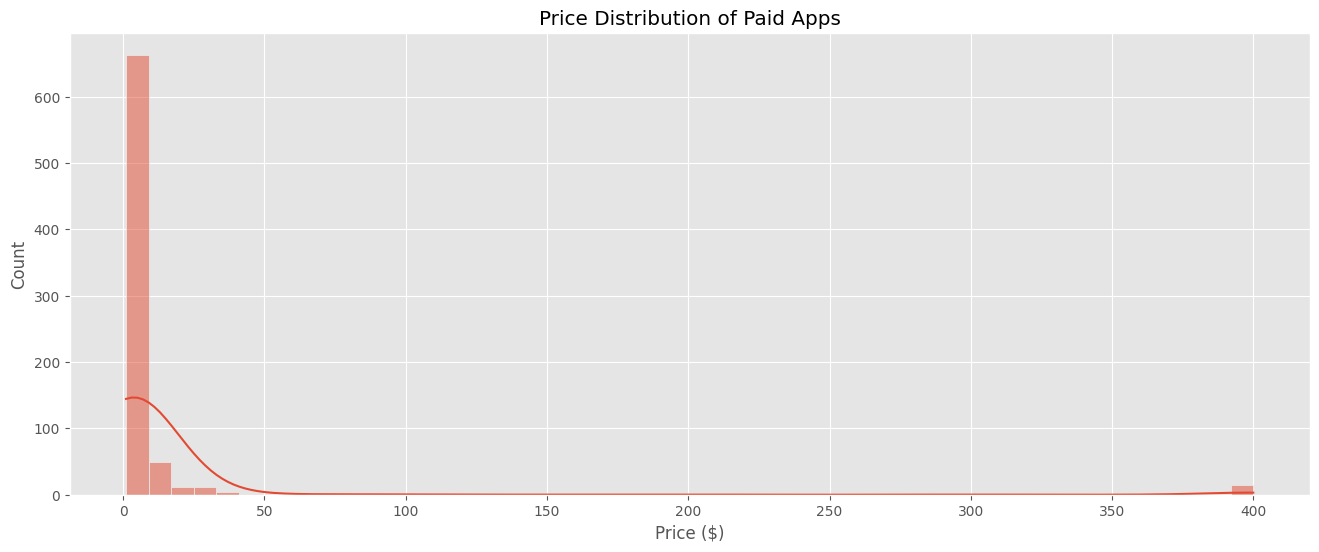

In [18]:
plt.figure(figsize=(16,6))
sns.histplot(df[df['Price'] > 0]['Price'], bins=50, kde=True)
plt.title("Price Distribution of Paid Apps")
plt.xlabel("Price ($)")
plt.show()


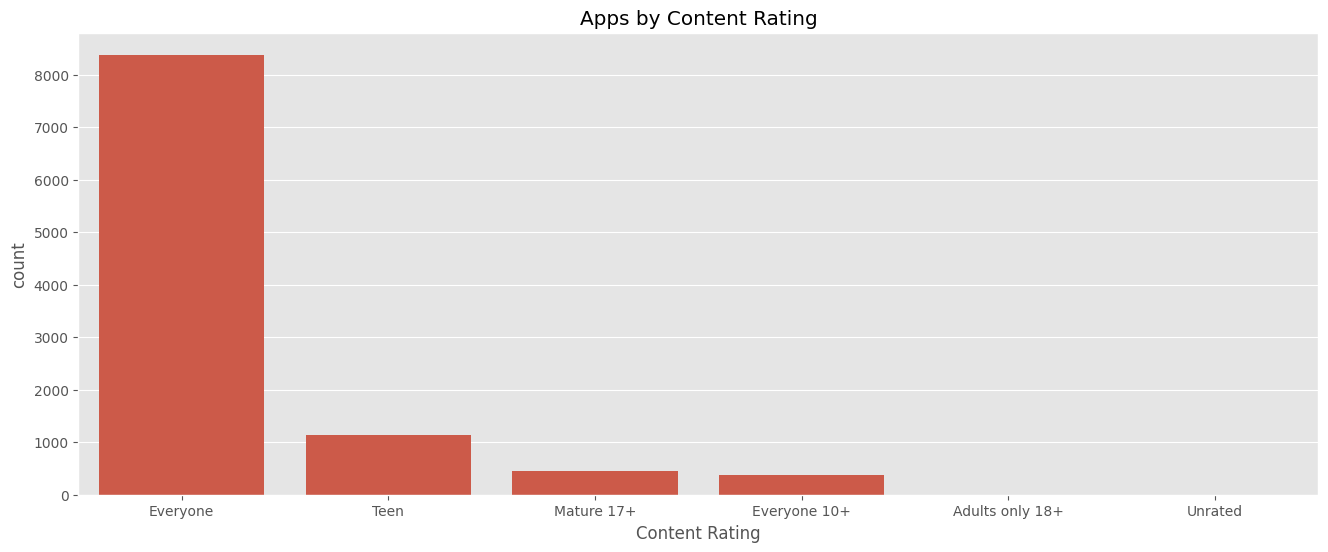

In [19]:
plt.figure(figsize=(16,6))
sns.countplot(x='Content Rating', data=df, order=df['Content Rating'].value_counts().index)
plt.title("Apps by Content Rating")
plt.show()


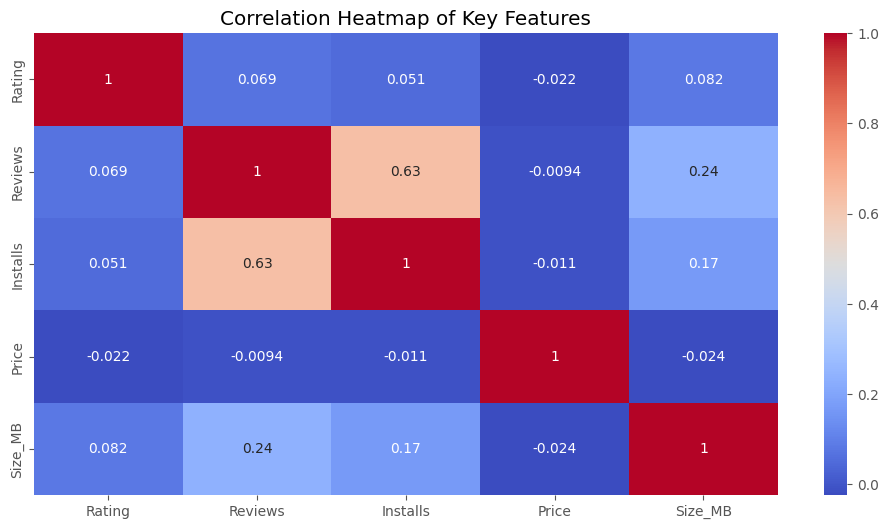

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['Rating','Reviews','Installs','Price','Size_MB']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Features")
plt.show()


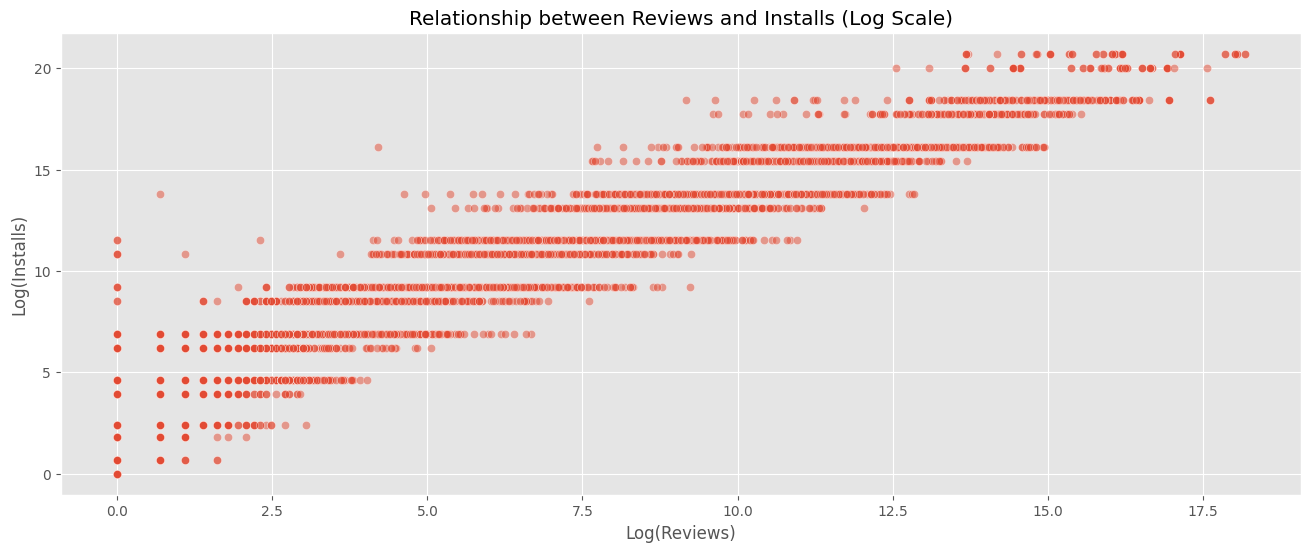

In [21]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=np.log1p(df['Reviews']), y=np.log1p(df['Installs']), alpha=0.5)
plt.title("Relationship between Reviews and Installs (Log Scale)")
plt.xlabel("Log(Reviews)")
plt.ylabel("Log(Installs)")
plt.show()


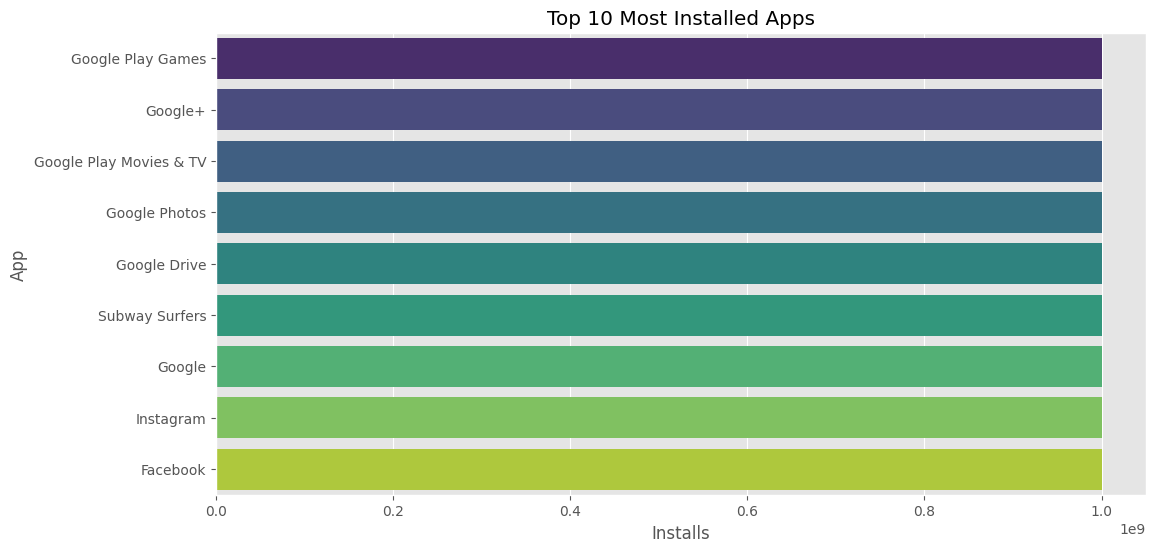

In [22]:
top_installed = df[['App','Installs']].sort_values(by='Installs', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Installs', y='App', data=top_installed, palette="viridis")
plt.title("Top 10 Most Installed Apps")
plt.show()


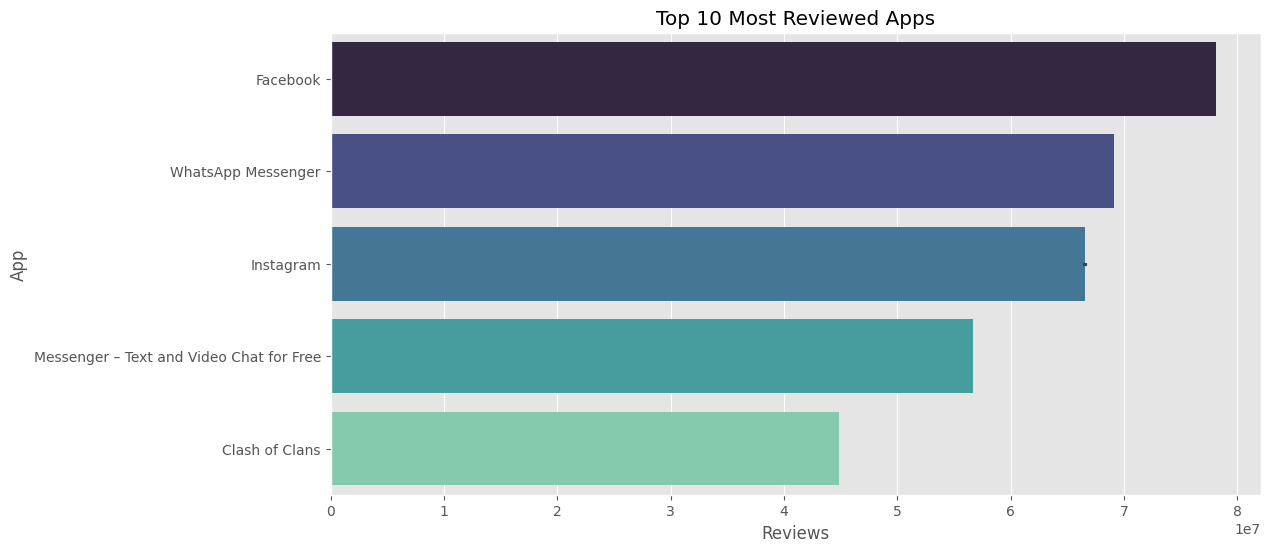

In [23]:
top_reviewed = df[['App','Reviews']].sort_values(by='Reviews', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Reviews', y='App', data=top_reviewed, palette="mako")
plt.title("Top 10 Most Reviewed Apps")
plt.show()


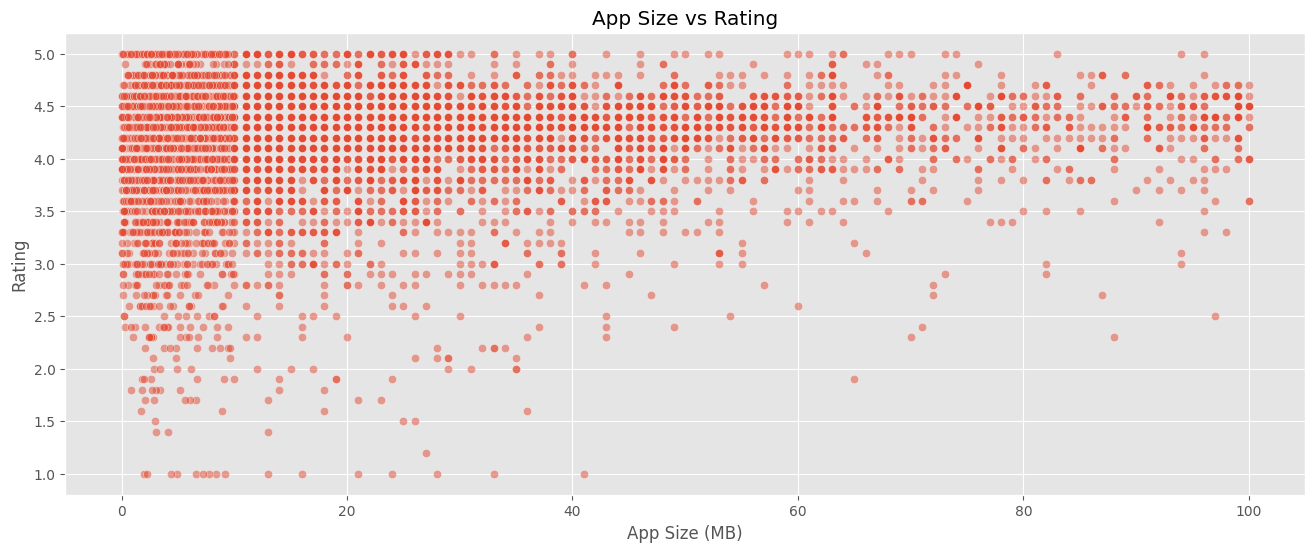

In [24]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=df['Size_MB'], y=df['Rating'], alpha=0.5)
plt.title("App Size vs Rating")
plt.xlabel("App Size (MB)")
plt.ylabel("Rating")
plt.show()


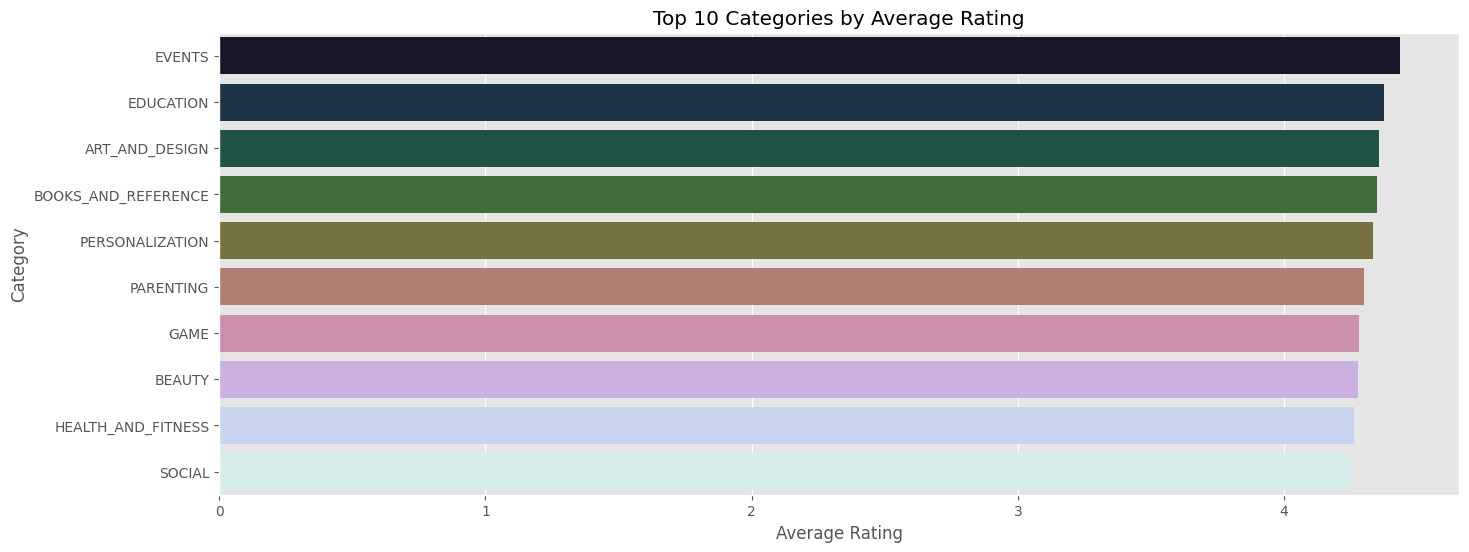

In [26]:
plt.figure(figsize=(16,6))
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="cubehelix")
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.show()


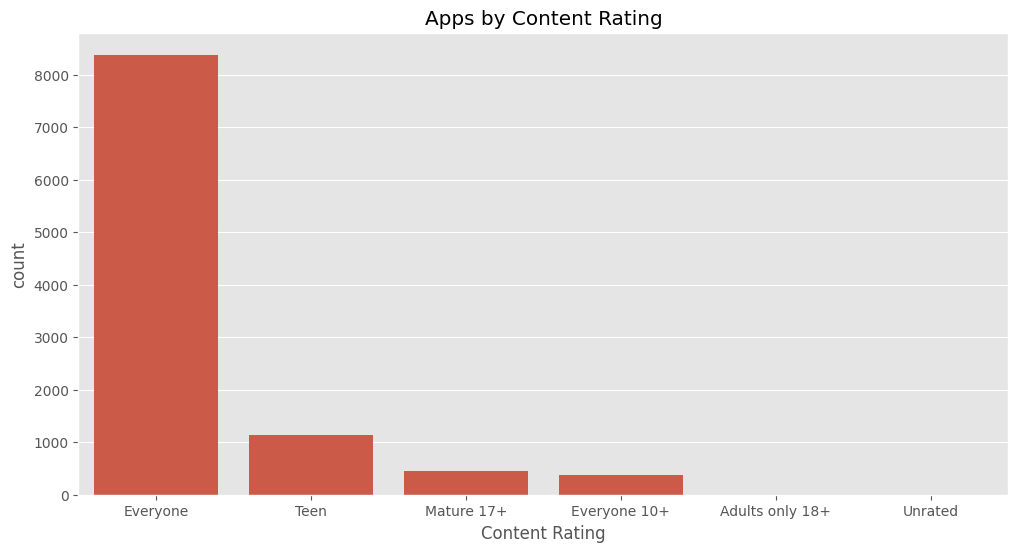

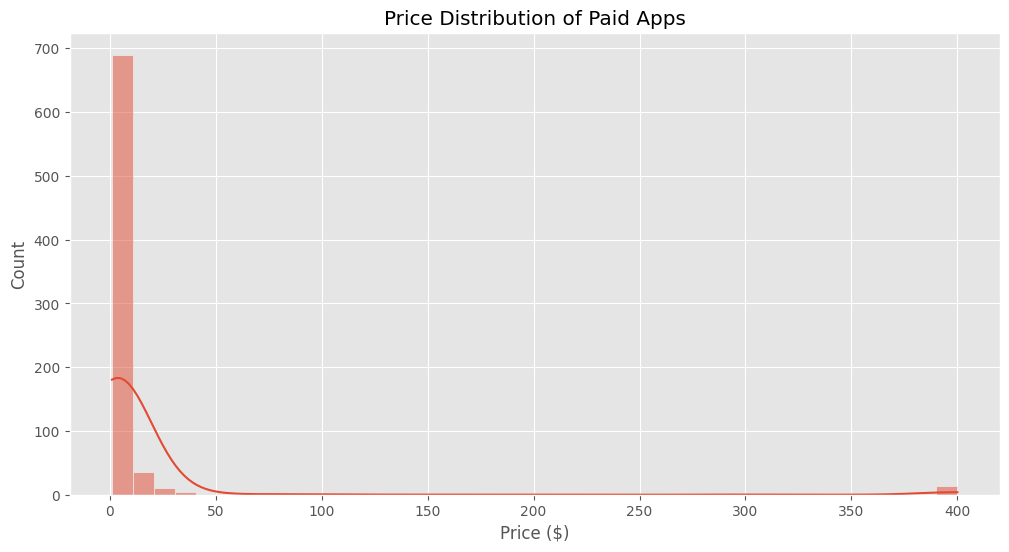

In [27]:
# Apps by Content Rating
plt.figure(figsize=(12,6))
sns.countplot(x='Content Rating', data=df, order=df['Content Rating'].value_counts().index)
plt.title("Apps by Content Rating")
plt.show()

# Price distribution of Paid Apps
plt.figure(figsize=(12,6))
sns.histplot(df[df['Price'] > 0]['Price'], bins=40, kde=True)
plt.title("Price Distribution of Paid Apps")
plt.xlabel("Price ($)")
plt.show()
